## 1.Придумайте и опишите наибольшее число вариантов использования этих данных. Для решения каких практических задач их можно применить?

Этим данным можно придумать достаточно много применений в разных областях, самые главные из которых следующие:
1. Самое первое, что приходит на ум - это индустрия страхования. 
    Можно предсказывать параметр риска (symboling) с помощью мультилейбл классификации или потери (normalized-losses) регрессией по всем характеристикам машины, чтобы понять, какой риск-фактор им присвоить или какие потери компании-страховщику ожидать от каждой модели автомобиля .
2.  Вторая индустрия - это продажи авто (как онлайн, так и оффлайн). Например, если мы - сервис по продажи б/у автомобилей, то мы можем оценить машину по её параметрам, которые задаёт клиент, а потом предложить ему подходящую цену на этот автомобиль.


## 2.Выберите одну из описанных вами задач и реализуйте ее решение на Python / R при помощи оптимальной на ваш взгляд модели. 

Я решил выбрать задачу предсказания цены автомобиля на основе его характеристик. Во-первых, потому что она сейчас реально используется во многих компаниях по e-commerce продажам автомобилей (carprice, auto.ru и т.д.), а во-вторых, потому что на этих данных эта задача реализуется лучше других.

## 3.Опишите ваш подход к предварительному анализу (в т.ч. визуализации) и обработке данных, работе с признаками, кросс валидацией, настройкой модели и ее оценкой. 

Импортируем все библиотеки

In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from pandas import ExcelWriter
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score
#регрессоры
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Создаем лейбл и шкалирование,пригодится позже 

In [23]:
scaler = StandardScaler()
label = LabelEncoder()

In [24]:
df=pd.read_csv('data.csv',index_col=False)

Смотрим на фичи и их распределения

In [32]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [33]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,price
0,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,?,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,?,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [19]:
df.columns

Index([u'symboling', u'normalized-losses', u'make', u'fuel-type',
       u'aspiration', u'num-of-doors', u'body-style', u'drive-wheels',
       u'engine-location', u'wheel-base', u'length', u'width', u'height',
       u'curb-weight', u'engine-type', u'num-of-cylinders', u'engine-size',
       u'fuel-system', u'bore', u'stroke', u'compression-ratio', u'horsepower',
       u'peak-rpm', u'city-mpg', u'price'],
      dtype='object')

Смотрим на типы переменных

In [20]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
price                  int64
dtype: object

In [ ]:
df.value_counts()

In [36]:
df=df2.copy()

Создаем функцию предобработки данных. Нам необходимо сделать несколько пунктов: 
1. Категориальное и частотное кодирование - частотное используем для того, чтобы похожие параметры по количеству упоминаний находились рядом - это для нашей модели улучшит качество, т.к при обычно лейб кодировании они могут находиться "далеко"
2. Производим скалирование переменных, чтобы большие по размеру фичи не выделялись, это полезно для некоторых моделей, которые мы будем использовать.
3. Производим замену пропусков на среднее или на сильно большее значение (чтобы выделить его)
4. Производим преобразование некоторых переменных (заменяем категориальные названия на числовые (пр. 'two' на '2')

In [49]:
def preproc(data):
    #удаляем лейбл
    y=data.price
    data['price']=data['price'].replace('?', data['price'].mean())
    data=data.drop(u'price', axis=1)
    #замена категориальных на числовые
    data['num-of-doors']=data['num-of-doors'].replace('two', 2)
    data['num-of-doors']=data['num-of-doors'].replace('four', 4)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('two', 2)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('three', 3)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('four', 4)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('five', 5)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('six', 6)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('eight', 8)
    data['num-of-cylinders']=data['num-of-cylinders'].replace('twelve', 12)
    #Категориальное кодирование
    cat_val=['fuel-type', 'aspiration', 'drive-wheels', 'engine-location']
    for i in cat_val:
        data[i]=label.fit_transform(data[i])
    #Частотное кодирование
    freq_val=['make', 'body-style',  'fuel-system', 'engine-type']
    for j in freq_val:
        cnt=collections.Counter(data[j])
        for i in range(len(cnt)):
            data[j][data[j]==list(cnt.keys())[i]]=list(cnt.values())[i]
    #Замена пропусков на нули и вопроса на большое значение
    data['normalized-losses']=data['normalized-losses'].replace('?', 300)
    data['num-of-doors']=data['num-of-doors'].replace('?', 0)
    data['bore']=data['bore'].replace('?', 0)
    data['stroke']=data['stroke'].replace('?', 0)
    data['horsepower']=data['horsepower'].replace('?', 0)
    data['peak-rpm']=data['peak-rpm'].replace('?', 0)
    data.fillna(data.mean(), inplace=True)
    #Шкалирование
    X=scaler.fit_transform(data)
    X=pd.DataFrame(X)
    X.columns=data.columns
    return X, y

In [50]:
X, y = preproc(df)

Разбиваем данные на трейн и тест

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Попробуем для сравнения 2 алгоритма - градиентный бустинг и случайный лес.
Метрику оценивания будем использовать R2, проводим кросс-валидацию по 7 фолдам и поиск наилучших гипер-параметров

In [75]:
clf = RandomForestRegressor(random_state=0)
tuned_parameters = [{'min_samples_split':np.arange(1, 4, 1)},
                     {'n_estimators':np.arange(5, 100, 5)},
                      {'max_depth':np.arange(1, 6, 1)}]
gs = GridSearchCV(clf, tuned_parameters, cv=7, verbose=True)
gs.fit(X_train, y_train)
preds_rf=gs.predict(X_test)

Fitting 7 folds for each of 27 candidates, totalling 189 fits


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    0.8s
[Parallel(n_jobs=1)]: Done 189 out of 189 | elapsed:    8.9s finished


In [71]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=55, n_jobs=1, oob_score=False,
           random_state=0, verbose=0)

In [72]:
clf = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
tuned_parameters = [{'learning_rate':np.arange(0.2, 1, 0.1)},
                     {'n_estimators':np.arange(60, 200, 20)},
                      {'max_depth':np.arange(2, 6, 1)}]
gs = GridSearchCV(clf, tuned_parameters, cv=5, verbose=True)
gs.fit(X_train, y_train)      
preds_gb=gs.predict(X_test)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed:    2.1s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    4.8s finished


## Опишите, почему вы выбрали именно эту модель. Обьясните выбор того или иного решения и, по возможности, сравните с альтернативами.

Я выбрал модель случайного леса и градиентного бустинга для сравнения, потому что обе модели достаточно сложные, чтобы решать разные задачи, при это достаточно легкие, чтобы не переобучаться на данных и не тратить много времени на обучение. Если бы было время, можно было сравнить результаты этих двух моделей с множеством других. 
Сравнивая же конкретно эти две модели: Random forest показал результат лучше, чем градиентный бустинг, поэтому будем использовать его. Однако важно заметить, что разность в качестве у случайного леса статистически не значимо больше, поэтому в этой задаче можно использовать любую из этих моделей

In [76]:
print ('r2_score GRAD BUST: ', r2_score(preds_gb, y_test))   
print ('r2_score RAND FOR: ', r2_score(preds_rf, y_test))   

('r2_score GRAD BUST: ', 0.87314423220087667)
('r2_score RAND FOR: ', 0.88564805343360098)


Видим, что модель достаточно точно описывает закономерность и не переобучилась

Смотрим на важность фич

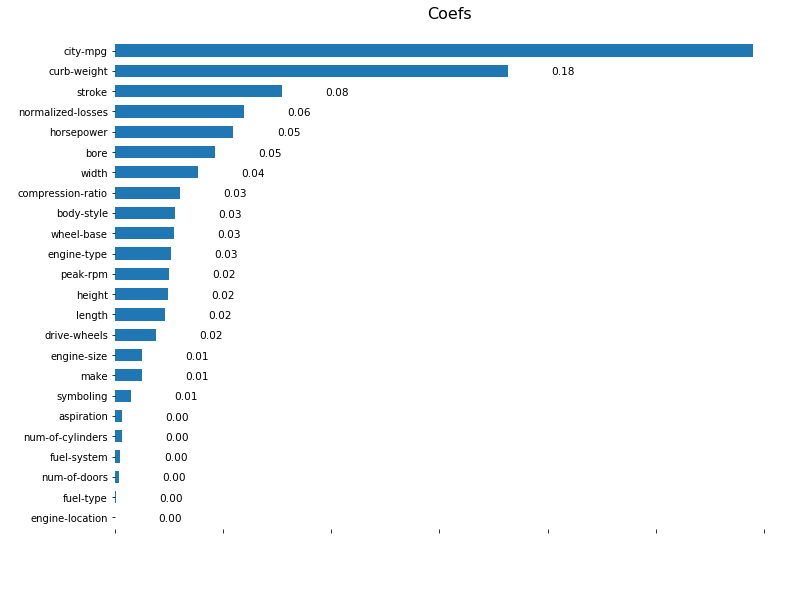

In [61]:
imp = pd.DataFrame(list(zip(df.columns, clf.feature_importances_)))
imp=imp[:30]
imp = imp.reindex(imp[1].abs().sort_values().index).set_index(0)
#график_фич
ax = imp.plot.barh(width = .6, legend = "", figsize = (12, 9))
ax.set_title("Coefs", y = 1.03, fontsize = 16.)
_ = ax.set(frame_on = False, xlabel = "", xticklabels = "", ylabel = "")
for i, label in enumerate(list(imp.index)):
    score = imp.loc[label][1]
    ax.annotate('%.2f' % score, (score + (-.12 if score < 0 else .02), i - .2), fontsize = 10.5)

## Пробуем ХГБ

In [ ]:
import xgboost as xgb

In [ ]:
cv_params = {'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 500, 'seed': 0,
              'subsample': 0.8, 'colsample_bytree': 0.8,'objective': 'reg:linear'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params),cv_params,cv=5, n_jobs=2, verbose=2)
optimized_GBM.fit(X_train, y_train)

In [ ]:
preds_xgb=optimized_GBM.predict(X_test)

In [ ]:
print ('r2_score RAND FOR: ', r2_score(preds_xgb, y_test))   

## 4.Опишите, как бы вы улучшали модель из пункта 2, если бы у вас было больше времени и существенно больший датасет.

На большем датасете и при большем количестве времени можно было бы попробовать гораздо более сложные модели, а также их стекинг (например, усреднение ответов нескольких десятков разных моделей типо SVM, regression, xgboost, NN и тд). Также, можно было бы перебрать большее количество параметров при поиске гипер-параметров или использовать библиотеку hyperopt для подбора. Еще можно было бы попробовать новую библиотеку градиентного бустинга catboost.
Также, из исходных данных можно было нагенерить много фич, основываясь на их бизнес-логики или просто сделать их суммы, произведения, разности и т.д, что может улучшить модель.